<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_09_classification_fashion_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## fashion_mnist 를 사용해 십진분류기 만들기(10가지 패션소품)

CNN을 이용



In [1]:
# 모듈 불러오기

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#패션소품에 각각 이름 붙여주기

label = ['Tshirst', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag',' ankle boot']

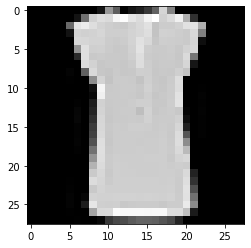

6
[[  0   0   0   0   0   0   0   0   0  22 152  93   2  21  32  57  97 213
  132   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  19 112 209 222 218 246 253 229 219 242 255 208
  219 240 175  48   0   0   0   0   0   0]
 [  0   0   0   0   0 106 228 235 222 212 206 203 201 209 216 225 196 204
  204 209 225 228 175   0   0   0   0   0]
 [  0   0   0   0   0  18 211 208 210 214 206 206 206 212 215 222 196 209
  208 205 202 216 128   0   0   0   0   0]
 [  0   0   0   0   0   0 215 214 212 211 204 202 204 211 225 216 198 206
  205 204 202 214  14   0   0   0   0   0]
 [  0   0   0   0   0   0 147 224 207 208 203 200 201 209 228 205 202 202
  204 200 210 216   0   0   0   0   0   0]
 [  0   0   0   0   0   0  42 224 201 203 201 201 201 207 222 203 201 202
  203 199 218 117   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 220 210 199 201 201 199 203 221 205 200 202
  202 200 214  22   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  98 217 199 197 202 199 200 207 

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

#28x28개의 픽셀인데 값이 있는 데이터만 밝기로 표현한 것

In [5]:
#원본데이터와 달리쓰기위해 소문자로 바꾼다  <대문자 = 이미지, 소문자 = 딥러닝에 사용>
#라벨을 원핫인코딩으로 바꿔주는 것이 to_categorical
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
#원핫인코딩 확인하기, 모델에 사용하기 위해서 픽셀값들을 원핫인코딩으로 바꿈

print(Y_train[11])
print(y_train[11])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
#데이터 스케일링

x_train = X_train / 255
x_test = X_test / 255
x_train = x_train.reshape(60000, 28, 28, 1)  #기존(60000, 28, 28)에서 각각 데이터의 값을 한 차원 늘려서 데이터가 학습되야 하므로 (60000, 28, 28, 1) > 1을 뒤에 붙인다, 1을 붙이면 안에 데이터를 리스트로 묶어준다는 것
#28개의 데이터가 묶인 것이 28개인 리스트씩 묶는 것
x_test = x_test.reshape(-1, 28, 28, 1)

만약 안에 데이터가 몇 개인지 모를 땐 (-1, 1)을 해준다 or 몇 개인 지 알 때, 14개의 데이터를 2개씩 묶고싶다면 reshape(7, 2)를 하면 된다
또는 몇 개인지 몰라도 2개씩의 데이터를 리스트에 넣고 싶다면 (-1, 2)를 넣어주면 된다

In [30]:
# 모델 레이어 설정
model = Sequential()

#필터로 특징을 뽑아주는 Conv2D, kernel_size=필터사이즈, padding 을 주면 이미지 주변에 상하좌우에 한 픽셀씩 입혀지고, 'same'을 주면 필터를 거쳐도 이미지 크기가 변화를 없게 해준다(입력과 출력 이미지 사이즈를 같게 해준다)
#Conv2D를 쓰면 MaxPool이 같이 따라와야한다
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))  #컬러 사진인 경우 input_dim=(28, 28, 1) 뒤에 1이 3이된다, 원색은 1, Conv2D(32 = 32는 필터의 수
model.add(MaxPool2D(padding='same', pool_size=(2, 2))) #(2, 2) = 반으로 사이즈가 줄어들게 된다
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')) #두 번째 conv2d 레이어에선 32개의 필터 세트가 32개가 생기는 것 (이미지 각각의 필터가 각각 만들어진다)
#그리고 각각 필터를 적용한 것을 한장으로 압축이돤다, 그래서 총 32장으로 압축이 되는 것
model.add(MaxPool2D(padding='same', pool_size=(2, 2))) #한 번 더 사이즈가 반으로 줄어서 총 7x7사이즈가 된다

#Conv2D가 다 끝나면 Flatten이 온 뒤 Dense가 오면 된다, Dropout은 Fltten뒤에 사용
model.add(Flatten())  #Flatten = 32장의 각각의 이미지를 한 줄로 쭉 늘인 것 (reshape와 같은 역할), Dense layer를 해주기 위해서 그 전에 적용해야한다
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  #옷 종류가 0~9라서 타겟수가 10개라서 10
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

파라미터 값 =   
7 x 7 x 32 x 128 + 128 = 200832

128 x 10 + 10 = 1290

합성곱(convolution) 신경망 레이어 케라스에서 제공하는 합성곱 레이어 중 영상처리에 주로 사용되는 Conv2D 레이어  

Conv2D(1, (2, 2), padding = 'valid', input_shape = (4, 4, 1), activation = 'relu')  

첫번째 인자: 합성곱 필터의 숫자  

두번째 인자: 합성곱 커널의 (행,열)  

padding : 경계 처리 방법  

valid : 출력사이즈는 입력 사이즈보다 작아집니다.  

same : 출력 이미지 사이즈와 입력 사이즈가 동일합니다.  

input_shape : 입력형태, (행, 열, 채널 수); 채널은 흑백이면 1, 컬러면 3입니다.  

activation : 활성화 함수를 설정

Conv2D 적용 방식

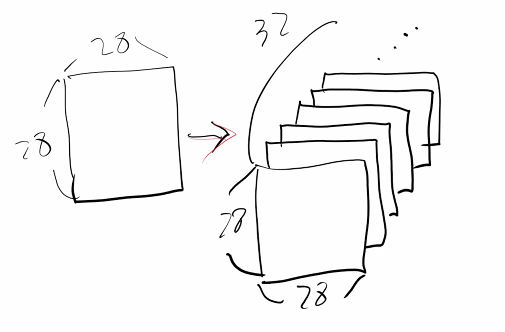

필터 적용 방식

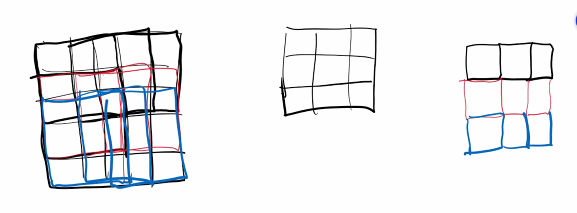

패딩 적용 방식 

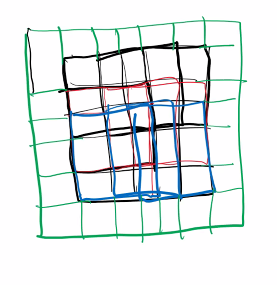

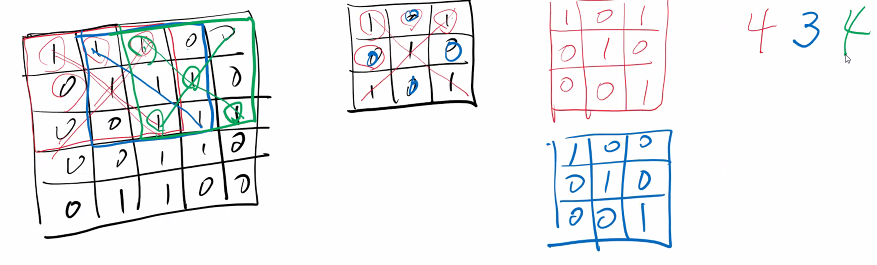

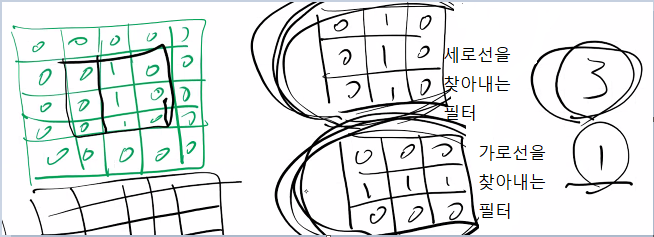

Maxpooling은 제일 큰 값을 찾아내는 것, conv2d와 다르게 겹쳐지지 않아서, 칸이 부족하다면 padding=same을 줘서 칸 수를 채워준다

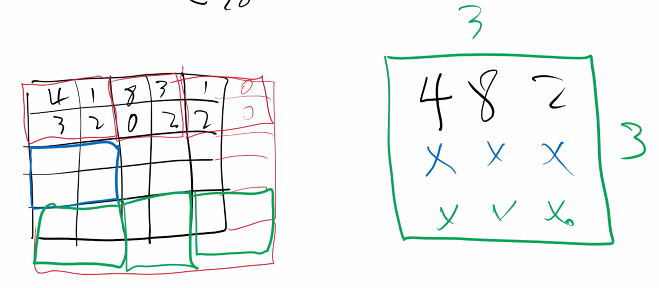

MaxPooling 까지 오면 이런 식으로 상황이 전개된다

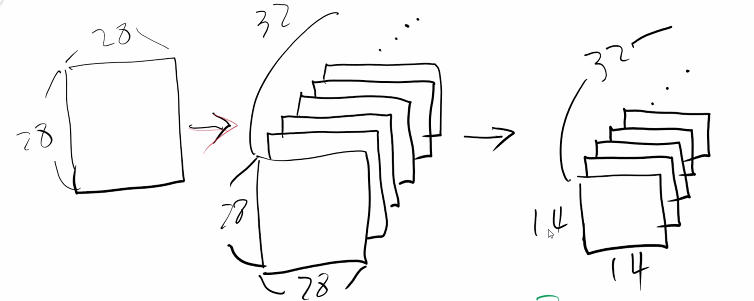

두 번째 conv2d 적용을 하면 32개의 필터 세트가 32개가 더 생기는 것이고, 각각 이미지 끼리의 필터를 적용하게 된다

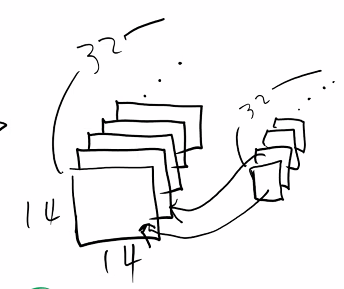

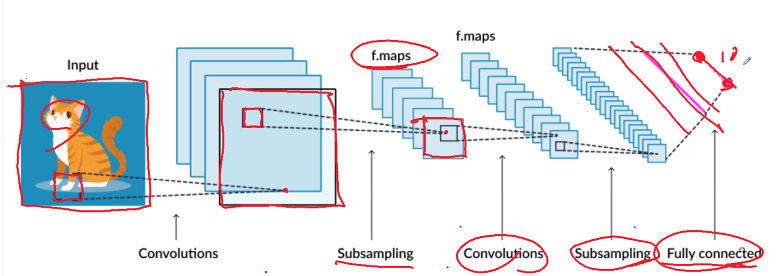

In [31]:
# 컴파일설정

opt = Adam(lr=0.01)
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#모델 학습하기
fit_hist = model.fit(x_train, y_train,batch_size=128, epochs=30, validation_split=0.2)

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.894599974155426


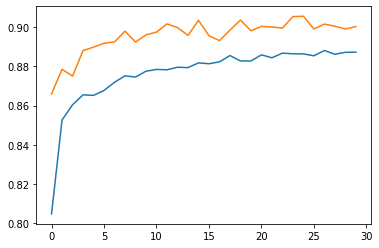

In [34]:
#plt으로 학습률 확인하기

plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])

trouser
[[3.4799915e-12 1.0000000e+00 1.4086003e-18 8.6079632e-10 2.3183820e-12
  2.4522450e-21 3.3149923e-16 1.0235206e-27 5.4052273e-15 1.1271539e-26]]
trouser


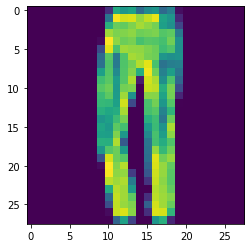

In [36]:
#정확률을 보기위해 임의의 그림을 주었을 때 숫자가 정확히 나오는 지 확인하기

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1,28,28,1))  #위에 주었던 x_test.reshape(-1, 28, 28, 1) 와 같은 크기로 reshape 해준다
print(pred)
print(label[np.argmax(pred)])